In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Read in the data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
df = df.sample(frac=0.1, random_state=10)
df.head()

Unnamed: 0  Clothing ID  Age                   Title  \
9170         9170          862   36                     Fun   
9346         9346          895   31             Great tunic   
6249         6249          836   42                     NaN   
17481       17481         1086   45      Feels like a dream   
5204         5204          854   44  This top surprised me!   

                                             Review Text  Rating  \
9170   These tanks are perfect for working out! they ...       4   
9346   I love this tunic. i am 22 weeks pregnant and ...       5   
6249   Fit is boxy yet flattering and material is she...       5   
17481  This dress is so soft, flowy and comfortable! ...       5   
5204   This too is easy to wear, skins the body nicel...       5   

       Recommended IND  Positive Feedback Count Division Name Department Name  \
9170                 1                        0       General            Tops   
9346                 1                        0       General            Tops   
6249                 1                        0       General            Tops   
17481                1                        1       General         Dresses   
5204                 1                        1       General            Tops   

       Class Name  
9170        Knits  
9346   Fine gauge  
6249      Blouses  
17481     Dresses  
5204        Knits

In [2]:
df.describe().T

count          mean          std   min     25%  \
Unnamed: 0               2349.0  11983.468284  6848.435412   7.0  5963.0   
Clothing ID              2349.0    912.830566   209.058943   0.0   860.0   
Age                      2349.0     43.464453    12.157475  18.0    35.0   
Rating                   2349.0      4.176671     1.142281   1.0     4.0   
Recommended IND          2349.0      0.817369     0.386446   0.0     1.0   
Positive Feedback Count  2349.0      2.401022     4.963591   0.0     0.0   

                             50%      75%      max  
Unnamed: 0               12131.0  18014.0  23477.0  
Clothing ID                931.0   1077.0   1203.0  
Age                         41.0     52.0     89.0  
Rating                       5.0      5.0      5.0  
Recommended IND              1.0      1.0      1.0  
Positive Feedback Count      1.0      3.0     77.0

In [3]:
#Checking for Missing values
df.isna().sum()

Unnamed: 0                   0
Clothing ID                  0
Age                          0
Title                      381
Review Text                 78
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name                0
Department Name              0
Class Name                   0
dtype: int64

In [4]:
#Rename the id and Department Name column to make the grouping easier
df = df.rename({'Review Text': 'Reviews', 'Department Name': 'dept_name', 'Division Name': 'Div_name', 'Class Name': 'Class_Name', 'Recommended IND': 'Recommended', 'Positive Feedback Count': 'Positive_feedback'}, axis=1)
df.head()

Unnamed: 0  Clothing ID  Age                   Title  \
9170         9170          862   36                     Fun   
9346         9346          895   31             Great tunic   
6249         6249          836   42                     NaN   
17481       17481         1086   45      Feels like a dream   
5204         5204          854   44  This top surprised me!   

                                                 Reviews  Rating  Recommended  \
9170   These tanks are perfect for working out! they ...       4            1   
9346   I love this tunic. i am 22 weeks pregnant and ...       5            1   
6249   Fit is boxy yet flattering and material is she...       5            1   
17481  This dress is so soft, flowy and comfortable! ...       5            1   
5204   This too is easy to wear, skins the body nicel...       5            1   

       Positive_feedback Div_name dept_name  Class_Name  
9170                   0  General      Tops       Knits  
9346                   0  General      Tops  Fine gauge  
6249                   0  General      Tops     Blouses  
17481                  1  General   Dresses     Dresses  
5204                   1  General      Tops       Knits

In [5]:
#We are dropping 3 columns: Clothing ID, Unnamed: 0, Title

df = df.drop(['Unnamed: 0', 'Clothing ID', 'Title'], axis = 1)

In [6]:
df.head()

Age                                            Reviews  Rating  \
9170    36  These tanks are perfect for working out! they ...       4   
9346    31  I love this tunic. i am 22 weeks pregnant and ...       5   
6249    42  Fit is boxy yet flattering and material is she...       5   
17481   45  This dress is so soft, flowy and comfortable! ...       5   
5204    44  This too is easy to wear, skins the body nicel...       5   

       Recommended  Positive_feedback Div_name dept_name  Class_Name  
9170             1                  0  General      Tops       Knits  
9346             1                  0  General      Tops  Fine gauge  
6249             1                  0  General      Tops     Blouses  
17481            1                  1  General   Dresses     Dresses  
5204             1                  1  General      Tops       Knits

In [7]:
#We are dropping 3 columns: Clothing ID, Unnamed: 0, Title

#df = df.drop(['Unnamed: 0', 'Clothing ID', 'Title'], axis = 1)

In [8]:
df.isna().sum()

Age                   0
Reviews              78
Rating                0
Recommended           0
Positive_feedback     0
Div_name              0
dept_name             0
Class_Name            0
dtype: int64

In [9]:
#Some columns in review still have some missing values, we just going to drop them 
df = df.dropna()

In [10]:
df.isna().sum()

Age                  0
Reviews              0
Rating               0
Recommended          0
Positive_feedback    0
Div_name             0
dept_name            0
Class_Name           0
dtype: int64

In [11]:
#We want to take out the neutral reviews from the rating column

df= df[df['Rating'] != 3] 


#Create a new column with the new ratings ut into a binary form 
#Turning 1s and 2s into 0s
#Turning 3s and 4s into 1s
df['Pos_Rated'] = np.where(df['Rating'] > 3, 1, 0)

In [12]:
df.shape

(2014, 9)

# Exploratory Data Analysis

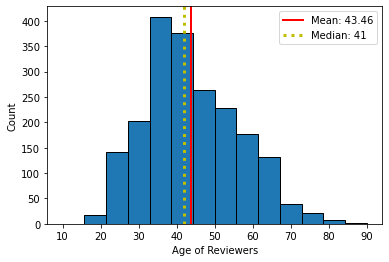

In [13]:
#Average age of reviewers
average_age = np.average(df['Age'])
median_age = np.median(df['Age'])


age = df['Age']

plt.hist(age, range=(10, 90), bins=14,edgecolor='black')
plt.xlabel('Age of Reviewers')
plt.ylabel('Count')
plt.axvline(average_age, color='r', linestyle='solid', linewidth=2, label="Mean: 43.46")
plt.axvline(median_age, color='y', linestyle='dotted', linewidth=3, label="Median: 41")
plt.legend()
plt.show()

<AxesSubplot:xlabel='dept_name', ylabel='Rating'>

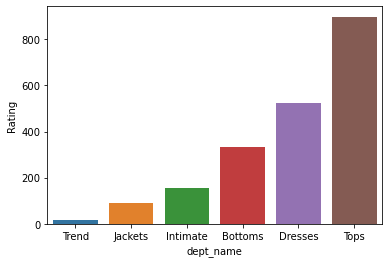

In [14]:
dep = df.groupby(['dept_name']).Rating.count().sort_values().reset_index()

sns.barplot(data=dep,
           x='dept_name',
           y='Rating'
)

#As seen on the grap, the top department is  the most successful department

<AxesSubplot:xlabel='Div_name', ylabel='Rating'>

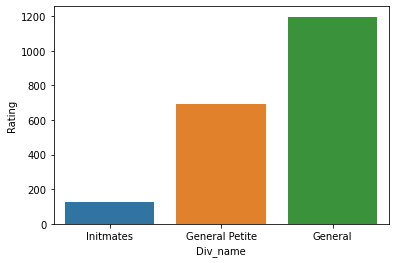

In [15]:
dep0 = df.groupby(['Div_name']).Rating.count().sort_values().reset_index()

sns.barplot(data=dep0,
           x='Div_name',
           y='Rating'
)

In [16]:
#Lenght of words each reviews

df['length'] = df['Reviews'].apply(len)
df.head()
leng = df['length']

In [17]:
print('Average number of words in each reviews:\n{}\n'.format(df['length'].mean()))

Average number of words in each reviews:
306.3857994041708



(array([  2.,   1.,   8.,  20.,  17.,  30.,  26.,  27.,  38.,  30.,  28.,
         49.,  44.,  38.,  33.,  39.,  58.,  44.,  46.,  54.,  48.,  51.,
         34.,  42.,  42.,  43.,  36.,  44.,  48.,  40.,  34.,  35.,  33.,
         48.,  30.,  36.,  24.,  34.,  23.,  30.,  30.,  33.,  23.,  33.,
         31.,  14.,  19.,  20.,  29., 395.]),
 array([ 16.  ,  25.78,  35.56,  45.34,  55.12,  64.9 ,  74.68,  84.46,
         94.24, 104.02, 113.8 , 123.58, 133.36, 143.14, 152.92, 162.7 ,
        172.48, 182.26, 192.04, 201.82, 211.6 , 221.38, 231.16, 240.94,
        250.72, 260.5 , 270.28, 280.06, 289.84, 299.62, 309.4 , 319.18,
        328.96, 338.74, 348.52, 358.3 , 368.08, 377.86, 387.64, 397.42,
        407.2 , 416.98, 426.76, 436.54, 446.32, 456.1 , 465.88, 475.66,
        485.44, 495.22, 505.  ]),
 <BarContainer object of 50 artists>)

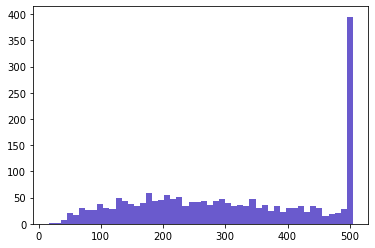

In [18]:
plt.hist(leng, color = 'slateblue', linewidth = 2, bins=50)

In [19]:
df[df['length'] == 100]['Reviews'].iloc[0]

'Simple style with a great fit. love the pink, mustard, and cream colors together. fits true to size.'

# Pre-Processing

#Text cleaning in Text mining(Removing punctuations, Stopwords, Tokenization), lemmatizing, Stemming

In [20]:
#Removing punctuation
import string
string.punctuation

def remove_punc(text):
    no_punct = "".join([i for i in text if i not in string.punctuation])
    return no_punct

df['Review_clear'] = df['Reviews'].apply(lambda x: remove_punc(x))

df['Review_clear'].head()

9170     These tanks are perfect for working out they h...
9346     I love this tunic i am 22 weeks pregnant and t...
6249     Fit is boxy yet flattering and material is she...
17481    This dress is so soft flowy and comfortable th...
5204     This too is easy to wear skins the body nicely...
Name: Review_clear, dtype: object

In [21]:
#Initiate Tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+")

df['Review_clear'] = df['Review_clear'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['Review_clear'].head(20)

9170     [these, tanks, are, perfect, for, working, out...
9346     [i, love, this, tunic, i, am, 22, weeks, pregn...
6249     [fit, is, boxy, yet, flattering, and, material...
17481    [this, dress, is, so, soft, flowy, and, comfor...
5204     [this, too, is, easy, to, wear, skins, the, bo...
22682    [this, top, is, extremely, well, made, the, fa...
17841    [i, dont, normally, write, reviews, but, i, lo...
21083    [i, had, been, looking, for, a, tee, to, wear,...
1302     [i, fell, in, love, with, this, dress, from, t...
15938    [this, top, is, way, more, sparkly, and, festi...
4512     [love, it, perfect, casual, look, with, a, jac...
11528    [i, cant, wait, for, it, to, get, colder, so, ...
9054     [i, love, this, dress, it, is, comfortable, an...
2096     [love, peplums, and, love, this, top, the, qua...
23356    [i, bought, this, dress, last, week, for, a, w...
9981     [love, everything, about, the, dress, my, only...
7768     [i, absolutely, love, the, look, style, of, th.

In [22]:
#Removing Stopwords
#stopwords.words('english') # Gives the list of stop words in english

def remove_stop(text):
    words = [i for i in text if i not in stopwords.words('english')]
    return words


df['Review_clear'] = df['Review_clear'].apply(lambda x : remove_stop(x))


df['Review_clear'].head()

9170     [tanks, perfect, working, big, armholes, could...
9346     [love, tunic, 22, weeks, pregnant, large, fit,...
6249     [fit, boxy, yet, flattering, material, sheer, ...
17481    [dress, soft, flowy, comfortable, material, sm...
5204     [easy, wear, skins, body, nicely, color, prett...
Name: Review_clear, dtype: object

In [23]:
#Lemmatizer of Reviews


import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 


#Intantiate lemmatizer
lem = WordNetLemmatizer()

def word_lem(text):
    lem_text = [lem.lemmatize(i) for i in text]
    return lem_text

df['Review_clear'] = df['Review_clear'].apply(lambda x: word_lem(x))
df['Review_clear'].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omike\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


9170     [tank, perfect, working, big, armhole, could, ...
9346     [love, tunic, 22, week, pregnant, large, fit, ...
6249     [fit, boxy, yet, flattering, material, sheer, ...
17481    [dress, soft, flowy, comfortable, material, sm...
5204     [easy, wear, skin, body, nicely, color, pretty...
Name: Review_clear, dtype: object

In [24]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def word_stem(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

df['Review_clear'] = df['Review_clear'].apply(lambda x: word_stem(x))
df['Review_clear'].head()

9170     tank perfect work big armhol could work bralet...
9346     love tunic 22 week pregnant larg fit great wis...
6249     fit boxi yet flatter materi sheer overli delic...
17481    dress soft flowi comfort materi smooth silki i...
5204     easi wear skin bodi nice color pretti retail t...
Name: Review_clear, dtype: object

In [25]:
df.head()

Age                                            Reviews  Rating  \
9170    36  These tanks are perfect for working out! they ...       4   
9346    31  I love this tunic. i am 22 weeks pregnant and ...       5   
6249    42  Fit is boxy yet flattering and material is she...       5   
17481   45  This dress is so soft, flowy and comfortable! ...       5   
5204    44  This too is easy to wear, skins the body nicel...       5   

       Recommended  Positive_feedback Div_name dept_name  Class_Name  \
9170             1                  0  General      Tops       Knits   
9346             1                  0  General      Tops  Fine gauge   
6249             1                  0  General      Tops     Blouses   
17481            1                  1  General   Dresses     Dresses   
5204             1                  1  General      Tops       Knits   

       Pos_Rated  length                                       Review_clear  
9170           1     175  tank perfect work big armhol could work bralet...  
9346           1     170  love tunic 22 week pregnant larg fit great wis...  
6249           1     129  fit boxi yet flatter materi sheer overli delic...  
17481          1     445  dress soft flowi comfort materi smooth silki i...  
5204           1     360  easi wear skin bodi nice color pretti retail t...

# Training the data

In [26]:
from sklearn.model_selection import train_test_split


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Review_clear'], 
                                                    df['Pos_Rated'], 
                                                    random_state=0)

In [27]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 bought next year order 27 28 kept 27 would say pretti true 6


X_train shape:  (1510,)


# CounterVectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


# Fit the CountVectorizer to the training data
 
vect = CountVectorizer().fit(X_train) 
#When pre-processing data and everything lower case put in the CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [29]:
vect.get_feature_names()[::200]

['00',
 'accessor',
 'balck',
 'button',
 'complet',
 'deveri',
 'fabric',
 'gener',
 'id',
 'leav',
 'mock',
 'overcom',
 'priceyik',
 'rumpl',
 'sky',
 'style',
 'togeth',
 'volum',
 'yuck']

In [30]:
len(vect.get_feature_names())

3605

In [31]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized
#all the info are store into a matrix where each row represents a document anad each column a word from our training vocabulary
# The matrix table represent how many times each word is represented in a document

<1510x3605 sparse matrix of type '<class 'numpy.int64'>'
	with 38766 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

#The possibility of the review being positive is 70% (based on the frequency of the word)

AUC:  0.694866360532203


In [34]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['return' 'disappoint' 'huge' 'unflatt' 'apart' 'thin' 'bad' 'shape'
 'complet' 'noth']

Largest Coefs: 
['littl' 'perfect' 'perfectli' 'compliment' 'medium' 'store' 'comfort'
 'great' 'fun' 'nice']


# TfidfVectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

#The inverse document frequency measure of how much information the word provides. It measures the weight of a given word in the entire document.
#TFIDF show how common or rare a given word is across all documents
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

#Min_df will remove any words from our vocabulary that appear in fewer than five documents

1054

In [36]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

#The possibility of the review being positive is 54% (Really in the middle, Observation based on the meaning and frequency of the word)

AUC:  0.5175438596491229


In [37]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

#High weight is given to words that appear in a particular document but dont appear often in the corpus
#Features with high tf–idf are frequently used within specific documents, but rarely used across all documents
#Features with low tfidf are either commonly used across all documents or rarely used and only occur in long documents.

Smallest tfidf:
['pale' 'sleeveless' 'happen' 'breaker' 'sew' 'given' 'springsumm'
 'attach' 'annoy' 'shade']

Largest tfidf: 
['embroideri' 'alin' 'huge' 'overal' 'shoe' 'cheap' 'dress' 'wrap' 'bulki'
 'style']


In [38]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['return' 'disappoint' 'huge' 'unflatt' 'shape' 'thin' 'cheap' 'shirt'
 'fabric' 'materi']

Largest Coefs: 
['perfect' 'great' 'love' 'littl' 'comfort' 'wear' 'soft' 'nice' 'size'
 'perfectli']


In [39]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 1]


# n-grams

In [40]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

1819

In [41]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.6982220652301896


In [42]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['return' 'disappoint' 'huge' 'unflatt' 'bad' 'go back' 'complet' 'apart'
 'want love' 'arriv']

Largest Coefs: 
['littl' 'perfect' 'perfectli' 'compliment' 'love' 'store' 'fun' 'comfort'
 'nice' 'great']


In [43]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))


[1 1]


# Naive Bayes

In [44]:
#Support Vector Machines with SCIKIT learn

from sklearn import metrics
from sklearn import naive_bayes
clfrNB = naive_bayes.MultinomialNB()
clfrNB.fit(X_train_vectorized, y_train)
predicted_labels1 = clfrNB.predict(vect.transform(X_test))
print("Accuracy:", metrics.f1_score(y_test, predicted_labels1, average = 'micro'))

Accuracy: 0.9246031746031746


In [45]:
from sklearn import svm
clfrSVM = svm.SVC(kernel='linear', C=0.1)
clfrSVM.fit(X_train_vectorized, y_train)
predicted_labels2 = clfrSVM.predict(vect.transform(X_test))
print("Accuracy:", metrics.f1_score(y_test, predicted_labels2, average = 'micro'))

Accuracy: 0.9087301587301587


# Polarity

In [46]:
#from wordcloud import WordCloud, STOPWORDS
import sys
print(sys.executable)

C:\Users\omike\Anaconda3\python.exe


In [47]:
!pip install TextBlob
from textblob import *

In [48]:
df['polarity'] = df['Review_clear'].map(lambda text: TextBlob(text).sentiment.polarity)
df['polarity']

9170     0.312500
9346     0.638889
6249     0.037500
17481    0.191270
5204     0.410714
           ...   
442      0.610000
6225     0.233333
4356     0.166667
331      0.100000
6410     0.116667
Name: polarity, Length: 2014, dtype: float64

In [49]:
import plotly.express as px
px.histogram(df, x = 'polarity',color="Rating", opacity = 0.5)

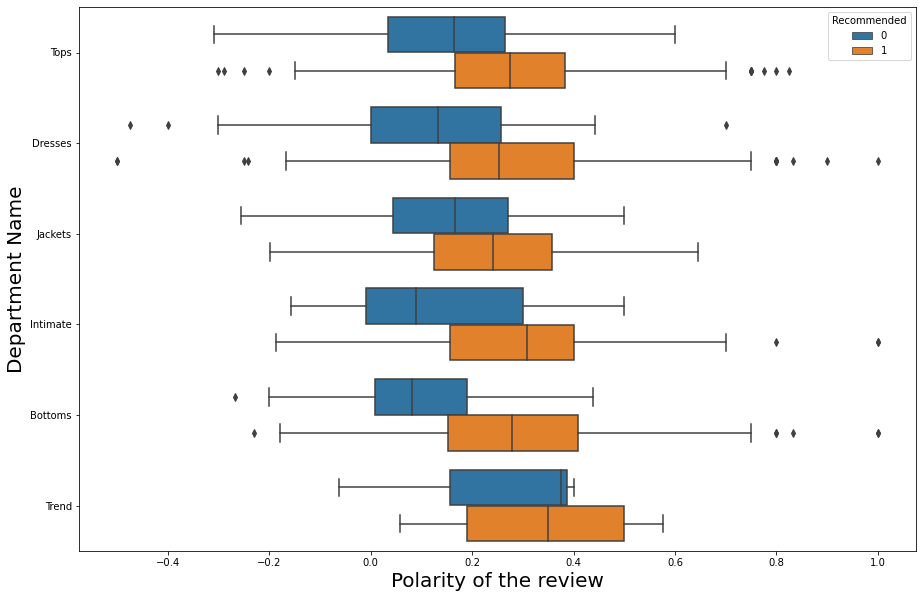

In [50]:
plt.figure(figsize = (15,10))
sns.boxplot(x="polarity", y="dept_name", hue = "Recommended", data = df)
plt.xlabel("Polarity of the review", fontsize = 20)
plt.ylabel("Department Name", fontsize = 20)

plt.show()

# WorldCloud

In [51]:
positive = df[df.Recommended== 1]
negative = df[df.Recommended== 0]
positive.head()

Age                                            Reviews  Rating  \
9170    36  These tanks are perfect for working out! they ...       4   
9346    31  I love this tunic. i am 22 weeks pregnant and ...       5   
6249    42  Fit is boxy yet flattering and material is she...       5   
17481   45  This dress is so soft, flowy and comfortable! ...       5   
5204    44  This too is easy to wear, skins the body nicel...       5   

       Recommended  Positive_feedback Div_name dept_name  Class_Name  \
9170             1                  0  General      Tops       Knits   
9346             1                  0  General      Tops  Fine gauge   
6249             1                  0  General      Tops     Blouses   
17481            1                  1  General   Dresses     Dresses   
5204             1                  1  General      Tops       Knits   

       Pos_Rated  length                                       Review_clear  \
9170           1     175  tank perfect work big armhol could work bralet...   
9346           1     170  love tunic 22 week pregnant larg fit great wis...   
6249           1     129  fit boxi yet flatter materi sheer overli delic...   
17481          1     445  dress soft flowi comfort materi smooth silki i...   
5204           1     360  easi wear skin bodi nice color pretti retail t...   

       polarity  
9170   0.312500  
9346   0.638889  
6249   0.037500  
17481  0.191270  
5204   0.410714

In [52]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:45]

'tank perfect work big armhol could work brale'

In [53]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'want love love color thought style would work anyon tri immedi took definit keep side zipper complaint mani realli made uncomfort also detail bust would lay flat look odd love materi definit green print knew would never wear look blah skirt gianorm usual take xl l order waistband xl huge didnt even tri fear would stay tri larg big well think would need medium cute alin appear pictur wonder even got look like huge hipi bunchi yuck wait dress go sale bo'

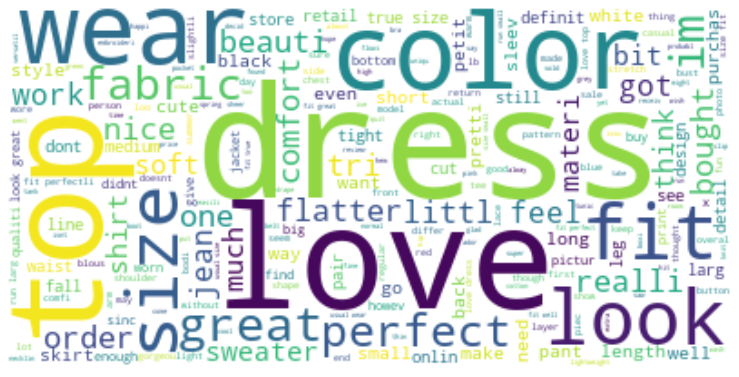

In [54]:
from wordcloud import WordCloud


wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

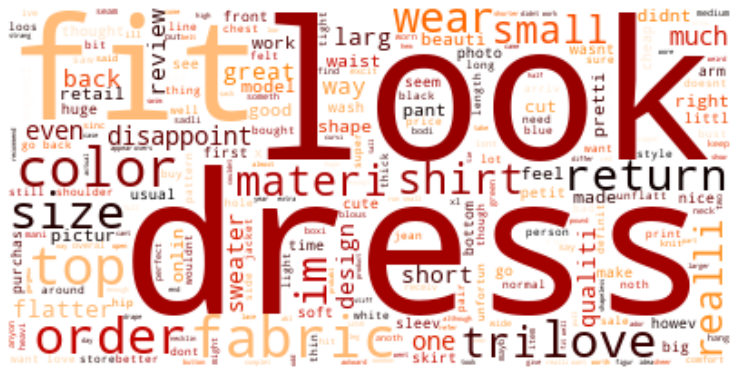

In [55]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
